# Import

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K
from keras.utils import to_categorical, plot_model

In [4]:
# Dataset do MNIST já está no Keras
from keras.datasets import mnist

In [5]:
# Import do Dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
import random

# Identify unique values in y_train
unique_values = list(set(y_train))

# Create a dictionary to store the indexes for each unique value
indexes_to_keep = {value: [] for value in unique_values}

# Collect all indexes for each unique value in y_train
for i, value in enumerate(y_train):
    indexes_to_keep[value].append(i)

# Randomly select 2 indexes for each unique value
selected_indexes = []
for indexes in indexes_to_keep.values():
    selected_indexes.extend(random.sample(indexes, 500))

# Sort the selected indexes to maintain the original order
selected_indexes.sort()

# Create y_train from the selected indexes
y_train = y_train[selected_indexes]
x_train = x_train[selected_indexes,:,:]

In [7]:
len(x_train)

5000

In [8]:
# Contar quantos de cada número resposta temos na base de treino
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500}


In [9]:
# Contar quantos de cada número resposta temos na base de teste
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [10]:
# Só para visualizar aleatóriamente 25 dos dados que possuimos
indexes = np.random.randint(0, x_train.shape[0], size=25)
# indexes = np.random.randint(0, len(y_train), size=25)
images = x_train[indexes]
labels = y_train[indexes]

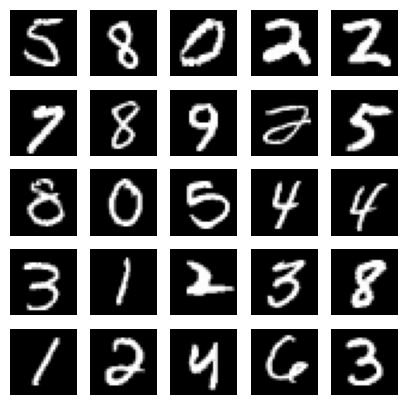

In [11]:
# Plotar 25 digitos do mnist
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

In [12]:
# Quantos valores únicos temos como resposta
num_labels = len(np.unique(y_train))
num_labels

10

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

In [13]:
# Converter a variável resposta para um one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [15]:
# O modelo aceita dados de 0 a 255, mas normalizar é indicado.

In [16]:
# Coletar o tamanho das imagens supondo que temos um quadrado
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [17]:
# Deixar unidimensional e normalizado
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [18]:
# Parametros da nossa rede
batch_size = 128
hidden_units = 256
dropout = 0.45

In [19]:
# Model is a 3-layer MLP (multilayer perceptron) with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

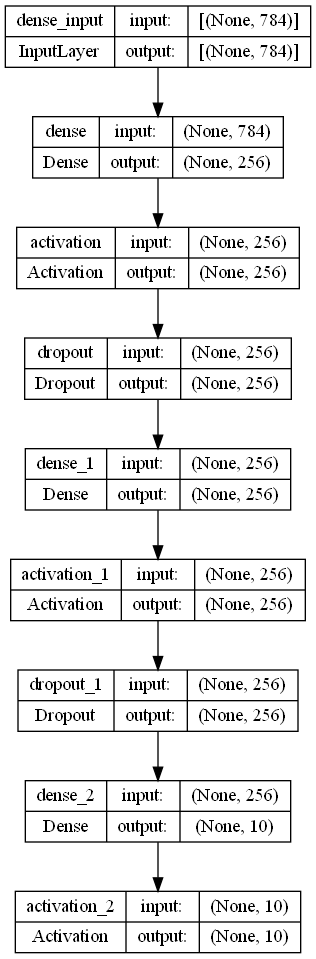

In [21]:
plot_model(model, show_shapes=True)

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
%%time
history = model.fit(x_train, y_train, epochs=100, batch_size=batch_size, validation_split = 0.1)

Epoch 1/100
36/36 [==============================] - 1s 9ms/step - loss: 1.4953 - accuracy: 0.5129 - val_loss: 0.5564 - val_accuracy: 0.8260
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 0.6466 - accuracy: 0.7969 - val_loss: 0.3605 - val_accuracy: 0.8900
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4724 - accuracy: 0.8484 - val_loss: 0.2991 - val_accuracy: 0.9160
Epoch 4/100
36/36 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8820 - val_loss: 0.2708 - val_accuracy: 0.9160
Epoch 5/100
36/36 [==============================] - 0s 5ms/step - loss: 0.3322 - accuracy: 0.9033 - val_loss: 0.2550 - val_accuracy: 0.9260
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.2978 - accuracy: 0.9089 - val_loss: 0.2286 - val_accuracy: 0.9400
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.2663 - accuracy: 0.9187 - val_loss: 0.2334 - val_accuracy: 0.9360
Epoch 8/100
3

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

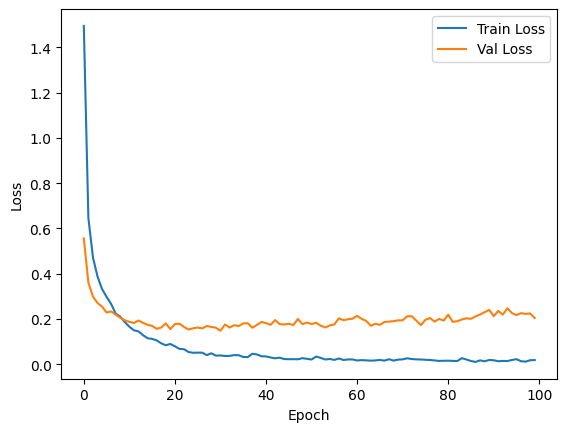

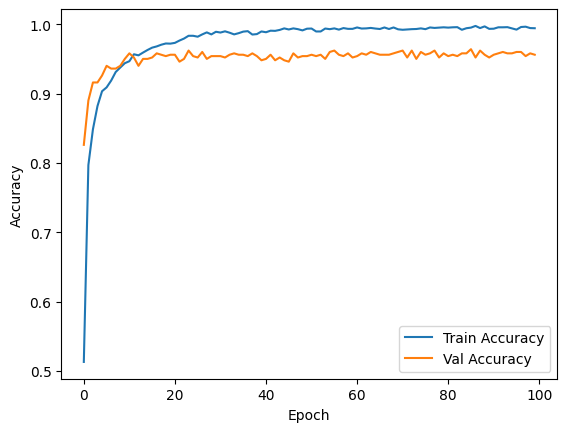

In [25]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],
             label = 'Val Loss')
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],
           label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],
           label = 'Val Accuracy')
    plt.legend()
    plt.show()
    
plot_history(history)

In [26]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9577

Test accuracy: 95.8%
